# Try visualisation methods on mass cytometry data
Data obtained from [DPT paper](http://www.helmholtz-muenchen.de/icb/research/groups/machine-learning/projects/dpt/index.html)

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import plotly
plotly.offline.init_notebook_mode() # run at the start of every ipython notebook
import plotly.plotly as py
import pcatsneOnMassCyto  # local library for plotting
import pandas as pd
import numpy as np
import bhtsne
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
# use seaborn plotting style defaults
sns.set()

In [2]:
doInteractive = True
def interactivePlots(fig, axes):
    # helper function to decide to use plotly interactive plots or not
    if(doInteractive):
        plotly.offline.iplot_mpl(fig, show_link=False, strip_style=True) # offline ipython notebook 
    

# Read data

In [9]:
# files obtain from dpt/examples/ESC_qpcr.m
d = pd.read_csv('dataDPT/ESC_qpcr_Goettgens_dataDS.csv')
# d = d.loc[::12, :]  # subsample every 12 point
pt = pd.read_csv('dataDPT/ESC_qpcr_Goettgens_DPT.csv', names=['PT'])
branch = pd.read_csv('dataDPT/ESC_qpcr_Goettgens_Branch.csv', names=['Branch'])
print('data shape\n', d.shape)

assert pt.size == branch.size
assert d.shape[0] == pt.size
print(d.head())
print(pt.head())
branch.head()

data shape
 (3934, 42)
    Cbfa2t3h  Cdh1       Cdh5      Egfl7        Erg      Ets1      Ets2  \
0  -2.598856 -11.0   1.815101  -0.096168  -4.038593 -2.836067  1.131549   
1 -11.000000 -11.0 -11.000000  -3.913417 -11.000000 -4.657568 -1.901249   
2 -11.000000 -11.0 -11.000000  -4.460142 -11.000000 -3.995105 -0.298499   
3 -11.000000 -11.0 -11.000000 -11.000000 -11.000000 -5.307169 -3.526606   
4  -3.907258 -11.0   0.019497  -0.715845  -2.546303 -2.370982  0.618567   

       Etv2      Etv6       Fli1    ...         Notch1     Pecam1      Procr  \
0 -0.671963 -1.636850   3.423682    ...      -5.003280  -0.046819  -2.222565   
1 -0.974527 -2.426527   0.951514    ...      -3.477990  -4.612856 -11.000000   
2  0.988462 -3.274385  -2.179872    ...      -5.254561 -11.000000 -11.000000   
3 -1.689075 -3.287569 -11.000000    ...     -11.000000 -11.000000 -11.000000   
4 -1.171905 -2.268570   2.889150    ...      -4.207031  -2.338428 -11.000000   

       Runx1      Sfpi1      Sox17       Sox7

,Branch
0,2
1,1
2,1
3,1
4,0


# Calculate PCA

In [11]:
F, Wt, X_proj, fracs = pcatsneOnMassCyto.do_pca(d)

In [12]:
fig=plt.figure(figsize=(5, 5))
plt.plot(np.cumsum(fracs))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
interactivePlots(fig, None)

# tSNE projection - fitting takes about 15 seconds

In [18]:
tsne = bhtsne.tsne(d, perplexity=30)

# Interactive widgets

In [14]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

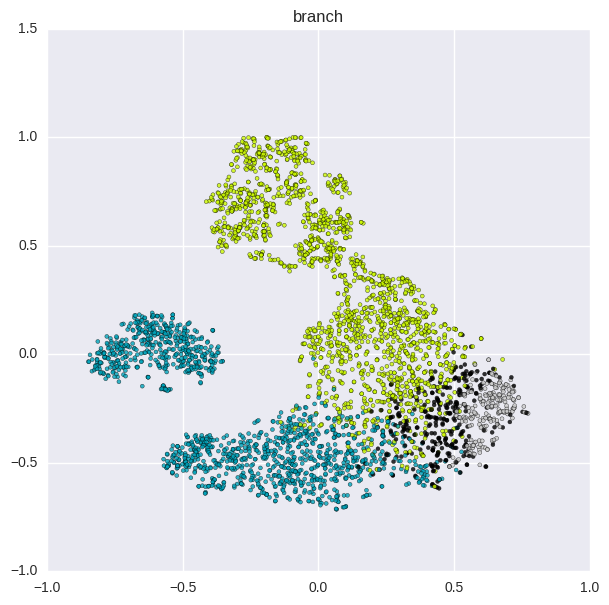

In [19]:
def plotinteractTSNE(strGene):
    if(strGene == 'pt'):
        ds = pt
    elif(strGene == 'branch'):
        ds = branch
    else:
        ds = d[strGene]
    pcatsneOnMassCyto.plot(tsne, [ds], [strGene], ngrid=(1, 1), figsize=(7, 7))
_=interact(plotinteractTSNE, strGene=list(d.columns.values)+['pt']+['branch'])

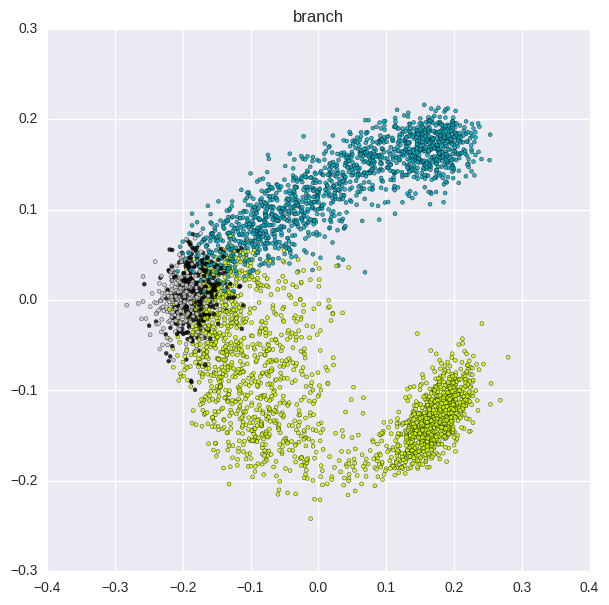

In [15]:
def plotinteractPCA(strGene, showPC):
    if(strGene == 'pt'):
        ds = pt
    elif(strGene == 'branch'):
        ds = branch
    else:
        ds = d[strGene]    
    if(showPC):
        _=pcatsneOnMassCyto.make_pca_plot(X_proj, Wt, F, [ds], [strGene], 
                                          figsize=(7, 7), ngrid=(1, 1))
    else:
        pcatsneOnMassCyto.plot(X_proj, [ds], [strGene], ngrid=(1, 1), figsize=(7, 7))
interact(plotinteractPCA, strGene=list(d.columns.values)+['pt']+['branch'], showPC=True)

In [16]:
d.shape

(3934, 42)

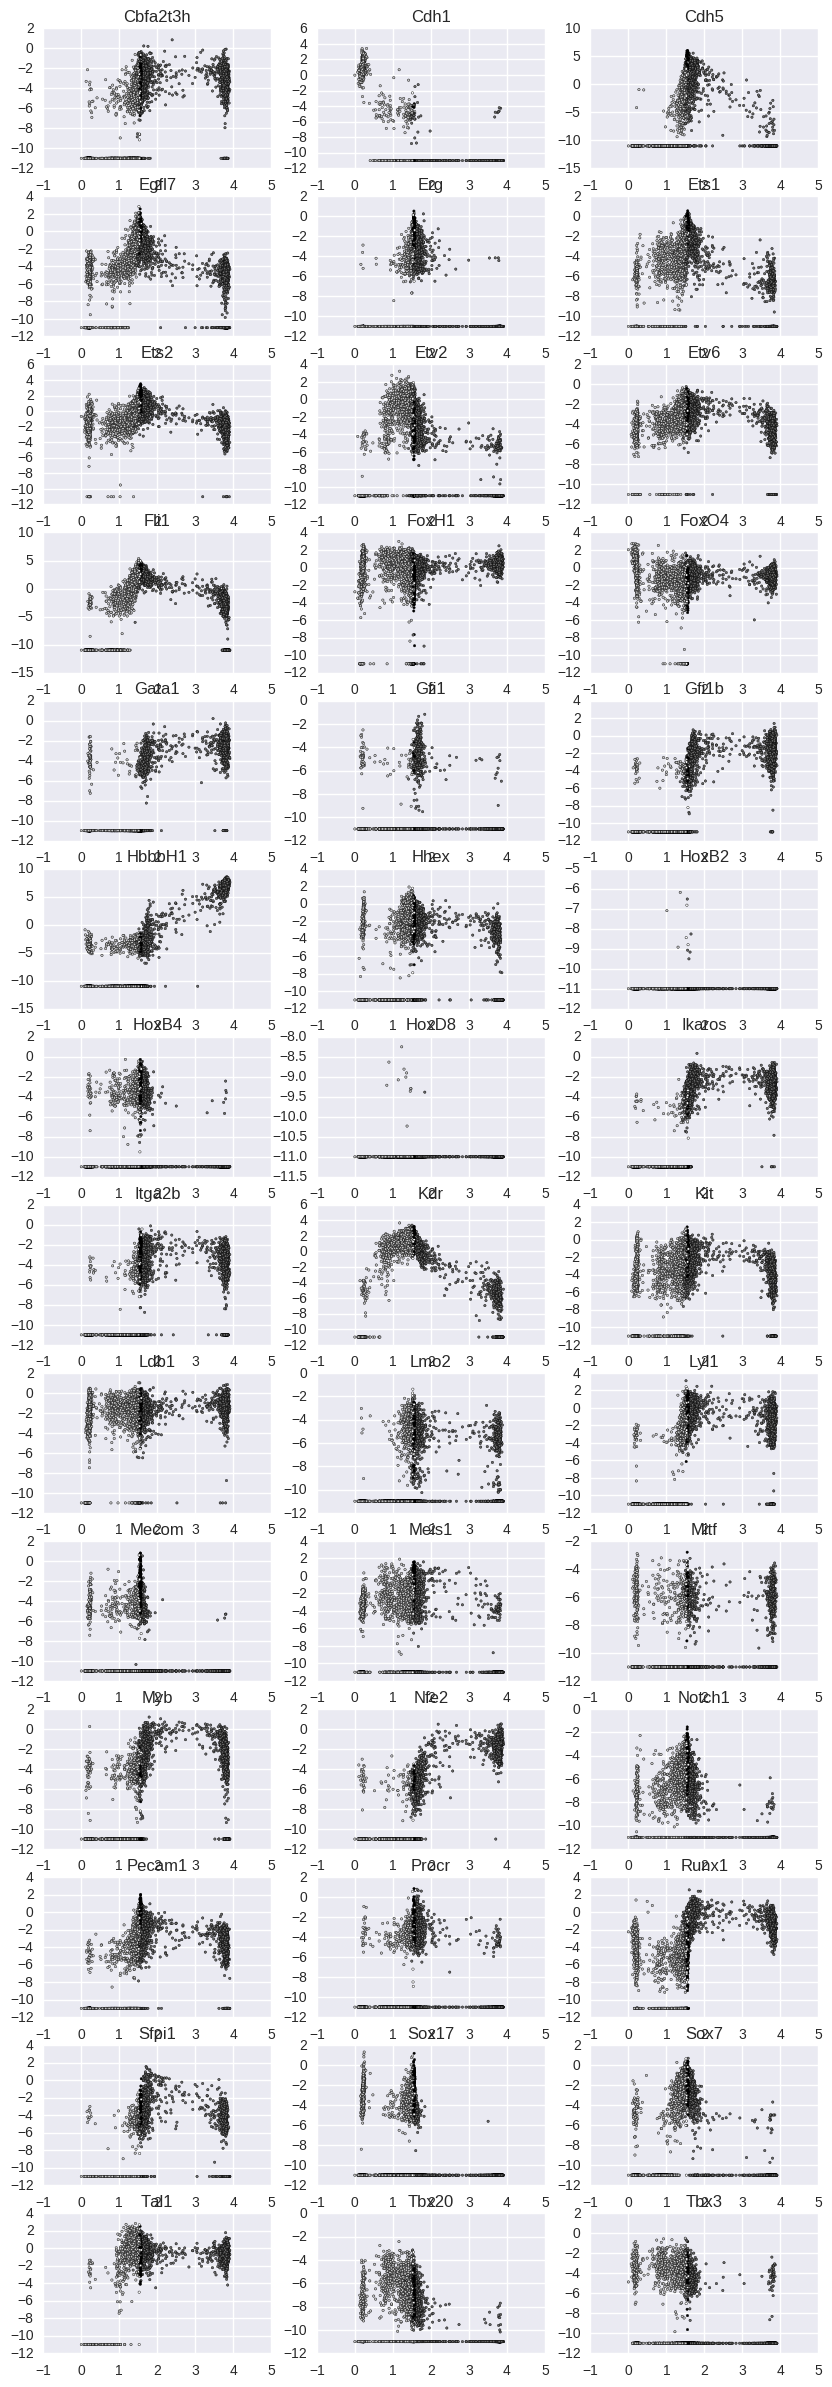

In [17]:
f, ax = plt.subplots(14, 3, figsize=(10, 30))
ax = ax.flatten()
for ig, g in enumerate(d.columns):
    ax[ig].scatter(pt, d[g], c=branch, s=3)
    ax[ig].set_title(g)
# interactivePlots(f, ax)

# Notes
1. We have missing data markered as -11